## 1. Why do missing values exist?
In the first chapter, we looked at the different types of data one may find when analyzing data. In this lesson, we will explore the concept of messy and missing values, how to find them, and once identified, how to deal with them.
### 1.1. Theory
#### How gaps in data occur
While in an ideal world every data set you come across would be perfectly complete and contain no gaps, unfortunately, this is rarely the case. Real world data often has noise or omissions. This can stem from many sources, for example: 
- Data not being collected properly (paper surveys not being filled out fully). 
- Collection and management errors (someone transcribing the data making a mistake).
- Data intentionally being omitted (people may want to skip the age box in an online form). Or 
- gaps could be created due to transformations of the data (average of a field with missing data). 

This list is far from comprehensive.

#### Why we care?
You may wonder why are we discussing this? Does missing data even matter? Yes, it does, and it is extremely important to identify and deal with missing data. 
- **Many machine learning models cannot work** with missing values, for example if you were performing `linear regression`, you would need a value for every row and column used in your data set.
- Missing data **may be indicative of a problem in your data pipeline**. If data is consistently missing in a `certain column`, you should *investigate as to why this is the case*. 
- Missing data **may provide information in itself**. For example, if the number of children of a person is missing they may have no children.

#### Missing value discovery
You can use the `info()` method to have a preliminary look at how complete the data set is.

In [4]:
import pandas as pd
so_survey_df = pd.read_csv(r"../input/feml-dataset/Combined_DS_v10.csv")
so_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


Right from the get go you can see that the `StackOverflowJobsRecommend`, `Gender`, and `RawSalary columns` are highly underpopulated and we should examine where these missing values occur. 

This list output is useful but becomes limited with larger datasets that have missing values scattered all over their features.

#### Finding missing values
To find where these missing values exist, you can use the `isnull() method` as shown here. All cells where missing values exist are shown as `True`.

In [5]:
so_survey_df.isnull().head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,False,False,True,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


You can also count the number of missing values in a specific column by chaining the `isnull()` and `sum()` methods as shown here.

In [6]:
print('Null_value of StackOverflowJobsRecommend : ', 
      so_survey_df['StackOverflowJobsRecommend'].isnull().sum())
so_survey_df.isnull().sum()

Null_value of StackOverflowJobsRecommend :  512


SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
dtype: int64

The inverse (or the non missing values) can also be found using the notnull() method. Here, all missing values are shown as False. Note that you can call the isnull() and notnull() methods on both the DataFrame as a whole, and on each of it's individual columns.

In [7]:
so_survey_df.notnull().head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,True,True,False,True,True,False,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,True,True,True,True,True,False,False
3,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


### 1.2. PRACTICES
#### Exercise 1.2.1. How sparse is my data?
Most data sets contain missing values, often represented as `NaN` (Not a Number). If you are working with Pandas you can easily check how many missing values exist in each column.

Let's find out how many of the developers taking the survey chose to enter their age (found in the Age column of so_survey_df) and their gender (Gender column of `so_survey_df`).
#### SOLUTION.

In [8]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


#### Exercise 1.2.2. Finding the missing values
While having a summary of how much of your data is missing can be useful, often you will need to find the exact locations of these missing values. 

Using the same subset of the `StackOverflow data` from the last exercise (`sub_df`), you will show how a value can be flagged as missing.
#### SOLUTION.
- The top 10 entries of the DataFrame

In [9]:
sub_df.head(10)

,Age,Gender
0,21,Male
1,38,Male
2,45,NaN
3,46,Male
4,39,Male
5,39,Male
6,34,Male
7,24,Female
8,23,Male
9,36,NaN


- The locations of the missing values

In [10]:
sub_df.head(10).isnull()

,Age,Gender
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


- The locations of the non-missing values

In [11]:
sub_df.head(10).notnull()

,Age,Gender
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,False


## 2. Dealing with missing values (Part I)
### 2.1. Theory.
Now that you can recognize why missing values occur and how to locate them, you need to know how they can be dealt with.
#### Listwise deletion
If you are confident that the missing values in your data set are occurring at random, (in other words not being intentionally omitted) the most effective and statistically sound approach to dealing with them is called `'complete case analysis'` or listwise deletion. In this method, a record is fully excluded from your model if any of its values are missing. 

Take for example the dataset shown here. Although most of the information is available in the first and third rows, because values in the ConvertedSalary column are missing, these rows will be dropped.

#### Listwise deletion in Python
To implement listwise deletion using pandas, you can use the `dropna()` method, by setting the how argument to `'any'`. This will delete all rows with at least one missing value.

In [12]:
any_drop = so_survey_df.dropna(how='any')
print('Dimension before droping NA values [how = "any"]: \t', so_survey_df.shape)
print('Then : \t\t', any_drop.shape)
any_drop.head()

Dimension before droping NA values [how = "any"]: 	 (999, 11)
Then : 		 (264, 11)


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"
5,2/9/18 19:09,Some college/university study without earning ...,120000.0,Yes,Russia,7.0,Git,39,2,Male,"120,000.00"
7,10/16/18 23:36,Some college/university study without earning ...,250000.0,Yes,France,7.0,Git,24,2,Female,"250,000.00"
17,8/21/18 10:48,Master's degree (MA. MS. M.Eng.. MBA. etc.),51408.0,Yes,USA,9.0,Git;Subversion,55,1,Male,"$51,408.00"


On the other hand, if you want to delete rows with missing values in only a specific column, you can use the `subset argument`. 

Pass a list of columns to this argument to specify which columns to consider when deleting rows.

In [13]:
drop_subset = so_survey_df.dropna(subset = ['VersionControl'])
print('Then dimension after using droping on subset (VersionControl colums):\t', drop_subset.shape)
drop_subset.head()

Then dimension after using droping on subset (VersionControl colums):	 (999, 11)


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


#### Issues with deletion
While the preferable approach in situations where missing data occurs purely at random is `listwise deletion`, it does have its drawbacks.
- First, it **deletes** perfectly **valid data points** that share a row with a missing value.
- Second, if the missing values do not occur entirely at **random** it can **negatively affect the model**. 
- Lastly, if you were to remove a feature instead of a row it can **reduce the degrees of freedom of your model**.

#### Replacing with strings
The most common way to deal with missing values is to simply fill these values using the `fillna() method`. 

To use the `fillna() method` on a specific column, you need to provide the value you want to replace the missing values with.

In the case of categorical columns, it is common to replace missing values with strings like `'Other'`, `'Not Given'` etc.

To replace the missing values in place, in other words to modify the original DataFrame, you need to set the `inplace` argument to `True`.

In [14]:
so_survey_df['VersionControl'].fillna(value = 'Non Given', inplace = True)

#### Recording missing values
In situations where you believe that the absence or presence of data is more important than the values themselves, you can create a new column that records the absence of data and then drop the original column. 

To do this, all you need to do is call the `notnull()` method on a specific column. 

In [15]:
so_survey_df['Salary_Given'] = so_survey_df['ConvertedSalary'].notnull()

This will output a list of True/False values, thus recording the presence/absence of data. To drop columns from a DataFrame, you can use the drop() method and specify a list of column names which you want to drop as the columns argument.

In [16]:
so_survey_df.drop(columns = ['ConvertedSalary']).head()

,SurveyDate,FormalEducation,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Salary_Given
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),Yes,South Africa,NaN,Git,21,13,Male,NaN,False
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",True
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),No,Sweeden,8.0,Git,45,11,NaN,NaN,False
3,5/9/18 1:06,Some college/university study without earning ...,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",True
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),Yes,UK,8.0,Git,39,7,Male,"£41,671.00",True


### 2.2. PRACTICES
#### Exercise 2.2.1. Listwise deletion
The simplest way to deal with missing values in your dataset when they are occurring entirely at random is to remove those rows, also called `'listwise deletion'`.

Depending on the use case, you will sometimes want to remove all missing values in your data while other times you may want to only remove a particular column if too many values are missing in that column.
#### SOLUTION
- Print the number of rows and columns.

In [17]:
so_survey_df = pd.read_csv(r"../input/feml-dataset/Combined_DS_v10.csv")
print(so_survey_df.shape)

(999, 11)


- Drop all rows with missing values in so_survey_df.

In [18]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna()

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 11)


- Drop all columns with missing values in so_survey_df.

In [19]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(inplace = False, axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 7)


- Drop all rows in so_survey_df where 'Gender' is missing.

In [20]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset = ['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 11)


#### Exercise 2.2.2. Replacing missing values with constants
While removing missing data entirely maybe a correct approach in many situations, this may result in a lot of information being omitted from your models.

You may find categorical columns where the missing value is a valid piece of information in itself, such as someone refusing to answer a question in a survey. In these cases, you can fill all missing values with a new category entirely, for example 'No response given'.
#### SOLUTION
- Step 1. Print the count of occurrences

In [21]:
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


- Step 2. Replace all missing values in the Gender column with the string `'Not Given'`. Make changes to the original DataFrame.

In [22]:
# Replace missing values
so_survey_df['Gender'].fillna(value = 'Not Given', inplace = True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


## 3. Dealing with Messy-data (Part 2.)
### 3.1. Theory.
#### Fill continuous missing values
While listwise deletion is often the most statistically sound method of dealing with missing values in cases where you believe the gaps are at random, this will often not be feasible in real world use cases.

#### Deleting missing values
One of the most common issues with removing all rows with missing values is if you were building a predictive model. 

If you were to remove all cases that had missing values when training your model, you would quickly run into problems when you received missing values in your test set, where you do not have the option of just not predicting these rows.

#### What else can you do?
So what's the alternative? Replacing missing values. 
- For **categorical columns**, as you saw in the last lesson you can either replace missing values with a string that flags missing values such as `'None'`, or you can use the `most common occurring value`. 
- However, for **numeric columns**, you may want to replace missing values with a more suitable value. So **what is a suitable value**?

#### Measures of central tendency
In cases like this we often turn to the measures of central tendency, which are the central or typical value for a distribution. The most commonly used values are the **mean** and the **median**. 

- One caveat that you must keep in mind when using these methods is that it can lead to biased estimates of the variances and covariances of the features. 
- Similarly, the standard error and test statistics can be incorrectly estimated so if these metrics are needed they should be calculated before the missing values have been filled.

#### Calculating the measures of central tendency
You can calculate these measures directly from a pandas series by simply calling the required method on the series as shown here. 

Note that the missing values are excluded by default when calculating these statistics.

In [23]:
print(so_survey_df['ConvertedSalary'].mean())
print(so_survey_df['ConvertedSalary'].median())

92565.16992481203
55562.0


#### Fill the missing values
Then leveraging what you implemented in previous lesson, you can directly fill all missing values using the `fillna() method`. 

Only this time you are filling missing values in the `ConvertedSalary column` with the mean of this column. Since you filled in the missing values with the mean, you may end up with too many decimal places.

In [24]:
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].fillna(so_survey_df['ConvertedSalary']).mean()

#### Rounding values
You can get rid of all the decimal values by changing the data type to integer using the `astype()` method like so. or you can first round the mean before filling in the missing values as shown here.

In [25]:
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].astype('int64')

### 3.2. PRACTICES
#### Exercise 3.2.1. Filling continuous missing values
In the last lesson, you dealt with different methods of removing data missing values and filling in missing values with a fixed string. 

These approaches are valid in many cases, particularly when dealing with categorical columns but have limited use when working with continuous values. 

In these cases, it may be most valid to fill the missing values in the column with a value calculated from the entries present in the column.
#### SOLUTION.
- Step 1. Print the first five rows of `StackOverflowJobsRecommend column`

In [26]:
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


- Step 2. Replace the missing values in the `StackOverflowJobsRecommend column` with its `mean`. 

Make changes directly to the original DataFrame.

In [27]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


- Step 3. Round the decimal values that you introduced in the `StackOverflowJobsRecommend column`.

In [28]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


#### Exercise 3.2.2. Imputing values in predictive models
When working with predictive models you will often have a separate train and test DataFrames. In these cases you want to ensure no information from your test set leaks into your train set. When filling missing values in data to be used in these situations how should approach the two data sets?

>- A. Only fill the `train set`.
>- B. Only fill the `test set`.
>- C. Apply the `measures of central tendency` (`mean/median` etc.) calculated on the train set to both the `train` and `test sets`.
>- D. Apply the `measures of central tendency` (`mean/median` etc.) calculated on the test set to both the `train` and `test sets`.
>- E. Apply the `measures of central tendency` (`mean/median` etc.) calculated on the train set to the `train set`, and the `measures` calculated on the `test set`, to the test set.

#### Answers.
>- A, B. Incorrect, gaps in both DataFrames will need to be filled.
>- **C. Correct!!** Values calculated on the train test should be applied to both DataFrames.
>- D, E. Incorrect, you should never calculate values based on your test set.

## 4. Dealing with other data issues
### 4.1. Theory.
Up to this point you have used multiple approaches to creating and updating features when missing values are present in the data, but data issues are of course not limited to just this. 

In some instances, you will come across features that need to be updated in some other way. 

Take for example the case of a column containing a monetary value. If this dataset has been imported from excel it may contain characters such as currency signs or commas that prevents pandas from reading it as numeric values.

#### Bad characters
For example, lets look at the data type of the `RawSalary column`. 

In [29]:
so_survey_df['RawSalary'].dtype

dtype('O')

In [30]:
so_survey_df['RawSalary'].head()

0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object

It's an `object`, although intuitively, you know that it should be numeric. So why is that?

Let's take a quick peek at the data. Numeric columns should not contain any non-numeric characters. So you need to remove these commas.

#### Dealing with bad characters
Although you want the column to be a numeric column, it is of type object, which means you can use string methods to fix this column. 

In this case, we want to remove all occurrences of comma. 

We can easily achieve this by accessing the str accessor and using the replace() method. 
- The first argument is the string you want to replace, which is the comma, and 
- the second argument is the string you want to replace it with, which here is an empty string, which simply means you want to remove all the commas. 

In [31]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].replace(',', '')

However, the data type of this column is still object. Now you can convert your column to the relevant type as shown here.

In [32]:
try : 
    so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')
except ValueError as e:
    print('ValueError :', e)

ValueError : could not convert string to float: '70,841.00'


#### Finding other stray characters
But what if attempting to change the data type raises an error? This may indicate that there are additional stray characters which you didn't account for. Instead of manually searching for values with other stray characters you can use the to_numeric() function from pandas along with the errors argument. If you set the errors argument to 'coerce', Pandas will convert the column to numeric, but all values that can't be converted to numeric will be changed to NaNs, that is missing values.

You can now use the isna() method like you did earlier to find out which values failed to parse. So it looks like we also have dollar signs. You can again use the replace() method as before to remove the dollar signs.

#### Chaining methods
Before you get going onto trying these for yourself, it will be useful to delve a little deeper into method chaining. 

If you are applying different methods or in fact the same method several times on a column, instead of assigning the result back to the column after each iteration, you can simply chain the methods, that is, call one method after the other to obtain the desired result. 

For example, cleaning up characters, changing the data type, normalizing the values etc. can all be achieved by simply calling the methods one after the other as seen here.

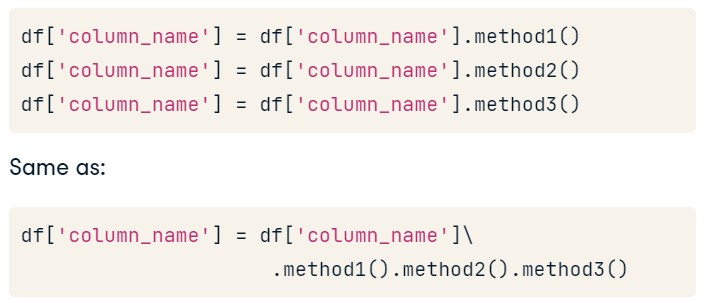

In [33]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

### 4.2. PRACTICES
#### Exercise 4.2.1. Dealing with stray characters (P. I)
In this exercise, you will work with the `RawSalary` column of `so_survey_df` which contains the wages of the respondents along with the currency symbols and commas, such as `$42,000`. 

When importing data from Microsoft Excel, more often that not you will come across data in this form.
#### SOLUTION
- Step 1. Remove the commas `(,)` from the `RawSalary column`.

In [34]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

- Step 2. Remove the dollar ($) signs from the RawSalary column.

In [35]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


#### Exercise 4.2.2. Dealing with stray characters (II)
In the last exercise, you could tell quickly based off of the df.head() call which characters were causing an issue. In many cases this will not be so apparent. There will often be values deep within a column that are preventing you from casting a column as a numeric type so that it can be used in a model or further feature engineering.

One approach to finding these values is to force the column to the data type desired using pd.to_numeric(), coercing any values causing issues to NaN, Then filtering the DataFrame by just the rows containing the NaN values.

Try to cast the RawSalary column as a float and it will fail as an additional character can now be found in it. Find the character and remove it so the column can be cast as a float.
#### SOLUTION
- Step 1.

In [36]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the first 5 relevant rows
print(so_survey_df['RawSalary'][idx].head())

0          NaN
2          NaN
4    £41671.00
6          NaN
8          NaN
Name: RawSalary, dtype: object


- Step 2.

In [37]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

print(so_survey_df['RawSalary'].head())

0        NaN
1    70841.0
2        NaN
3    21426.0
4    41671.0
Name: RawSalary, dtype: float64


#### Exercise 4.2.3. Method chaining
When applying multiple operations on the same column (like in the previous exercises), you made the changes in several steps, assigning the results back in each step. However, when applying multiple successive operations on the same column, you can `"chain"` these operations together for clarity and ease of management. This can be achieved by calling multiple methods sequentially:

            # Method chaining
            df['column'] = df['column'].method1().method2().method3()

            # Same as 
            df['column'] = df['column'].method1()
            df['column'] = df['column'].method2()
            df['column'] = df['column'].method3()
In this exercise you will repeat the steps you performed in the last two exercises, but do so using method chaining.

In [38]:
so_survey_df = pd.read_csv(r"../input/feml-dataset/Combined_DS_v10.csv")

# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df['RawSalary'].head())

0        NaN
1    70841.0
2        NaN
3    21426.0
4    41671.0
Name: RawSalary, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
